# Import Libraries¶

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.tree import plot_tree,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 1. Problem Statement

In [4]:
# To predict iris  by using various independent variables:

# 2. Data Gathering¶

In [5]:
df=pd.read_csv("iris.csv")
df.T

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
Id,1,2,3,4,5,6,7,8,9,10,...,141,142,143,144,145,146,147,148,149,150
SepalLengthCm,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
SepalWidthCm,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
PetalLengthCm,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
PetalWidthCm,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8
Species,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,...,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica


# 3. Exploratory Data Analysis

In [6]:
df.isna().sum() # checking null Values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

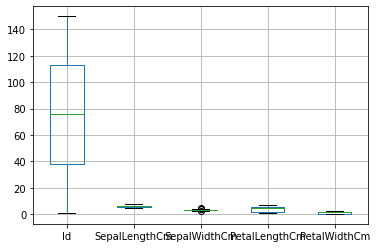

In [9]:
df.boxplot()

# 4. Feature Engineering

In [10]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [11]:
df.replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2},inplace=True)

# 5.Feature Selection

In [12]:
df.drop("Id",axis=1,inplace=True)


# Train Model

In [13]:
x=df.drop("Species",axis=1)
y=df["Species"]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y,random_state=10)

In [15]:
y_train.value_counts()

0    38
2    37
1    37
Name: Species, dtype: int64

# Instantiating Logestic Regression Model

In [16]:
logestic_reg_model=LogisticRegression()
logestic_reg_model.fit(x_train,y_train)

LogisticRegression()

In [17]:
import warnings
warnings.filterwarnings("ignore")

# Evaluation

In [18]:
# Evaluation on testing DataSet
y_pred=logestic_reg_model.predict(x_test)

confusion_matx=confusion_matrix(y_test,y_pred)
print("confusion_matrix:\n",confusion_matx)

acc_score=accuracy_score(y_test,y_pred)
print("accuracy_score:\n",acc_score)

clf_report=classification_report(y_test,y_pred)
print("classification_report:\n",clf_report)

confusion_matrix:
 [[12  0  0]
 [ 0 13  0]
 [ 0  0 13]]
accuracy_score:
 1.0
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [19]:
# Evaluation on training DataSet
y_pred_train=logestic_reg_model.predict(x_train)

confusion_matx=confusion_matrix(y_train,y_pred_train)
print("confusion_matrix:\n",confusion_matx)

acc_score=accuracy_score(y_train,y_pred_train)
print("accuracy_score:\n",acc_score)

clf_report=classification_report(y_train,y_pred_train)
print("classification_report:\n",clf_report)

confusion_matrix:
 [[38  0  0]
 [ 0 35  2]
 [ 0  0 37]]
accuracy_score:
 0.9821428571428571
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      0.95      0.97        37
           2       0.95      1.00      0.97        37

    accuracy                           0.98       112
   macro avg       0.98      0.98      0.98       112
weighted avg       0.98      0.98      0.98       112



# Knn KNeighborsClassifier

In [20]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
std_scaler = StandardScaler() # saving std and mean value
std_scaler.fit(x) # 

std_array = std_scaler.transform(x)
x_df = pd.DataFrame(std_array,columns=x.columns)
x_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


# By using Standerdization

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_df,y,test_size=0.2,random_state=20,stratify=y)

In [23]:
knn_regresor_model=KNeighborsClassifier()
knn_regresor_model.fit(x_train,y_train)

KNeighborsClassifier()

In [24]:
## Testing Data Evaluation
print("************ Testing Data Evaluation ********************")
y_pred = knn_regresor_model.predict(x_test)
print("*"*70)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*70)
acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",acc_score)
print("*"*70)
clf_report = classification_report(y_test,y_pred)
print("Classification Report :\n",clf_report)
print("*"*70)

************ Testing Data Evaluation ********************
**********************************************************************
Confusion Matrix :
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
**********************************************************************
Accuracy Score : 0.9666666666666667
**********************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

**********************************************************************


In [25]:
## Training Data Evaluation
print("************ Testing Data Evaluation ********************")
y_pred_train = knn_regresor_model.predict(x_train)
print("*"*70)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*70)
acc_score = accuracy_score(y_train,y_pred_train)
print("Accuracy Score :",acc_score)
print("*"*70)
clf_report = classification_report(y_train,y_pred_train)
print("Classification Report :\n",clf_report)
print("*"*70)

************ Testing Data Evaluation ********************
**********************************************************************
Confusion Matrix :
 [[40  0  0]
 [ 0 39  1]
 [ 0  4 36]]
**********************************************************************
Accuracy Score : 0.9583333333333334
**********************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.91      0.97      0.94        40
           2       0.97      0.90      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

**********************************************************************


# Hyperparameters

In [26]:
knn_clf=KNeighborsClassifier(p=2,n_neighbors=2)
hyperparameters={"n_neighbors":np.arange(1,20),
                "p":[1,2]}
gscv_knn_clf=GridSearchCV(knn_clf,hyperparameters,cv=2)
gscv_knn_clf.fit(x_train,y_train)
gscv_knn_clf.best_params_

{'n_neighbors': 5, 'p': 1}

# KNN after Hyperparameter Tuning

In [27]:
knn_clf = gscv_knn_clf.best_estimator_
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(p=1)

In [28]:
# Testing Data Evaluation
y_pred = knn_clf.predict(x_test)
print(y_test.value_counts())

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

acc_score = accuracy_score(y_test, y_pred)
print("Accuracy :",acc_score)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

1    10
2    10
0    10
Name: Species, dtype: int64
Confusion Matrix :
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Accuracy : 0.9666666666666667
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [29]:
# Training Data Evaluation
y_pred_train = knn_clf.predict(x_train)
print(y_train.value_counts())

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy :",acc_score)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

1    40
0    40
2    40
Name: Species, dtype: int64
Confusion Matrix :
 [[40  0  0]
 [ 0 38  2]
 [ 0  4 36]]
Accuracy : 0.95
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.90      0.95      0.93        40
           2       0.95      0.90      0.92        40

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



# Descion Tree

In [30]:
# Train Model
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
# Testing Data Accuracy
y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]
**************************************************
Accuracy Score is : 0.9333333333333333
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [32]:
# Training Data Accuracy
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]
**************************************************
Accuracy Score is : 1.0
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



# Decision Tree After Hyper parameter Tuning

In [33]:
dt_clf = DecisionTreeClassifier()

hyperparameters = {
                    "criterion" : ['gini','entropy'],
                    "max_depth" : np.arange(3,8),
                    "min_samples_split" : np.arange(2,20),
                    "min_samples_leaf": np.arange(2,10)
                    }

gscv_dt_model = GridSearchCV(dt_clf,hyperparameters, cv = 5)
gscv_dt_model.fit(x_train, y_train)
gscv_dt_model.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)

In [34]:
dt_clf = gscv_dt_model.best_estimator_
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)

In [35]:
# Testing Data Accuracy
y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
**************************************************
Accuracy Score is : 1.0
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [36]:
# Training Data Accuracy
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[40  0  0]
 [ 0 37  3]
 [ 0  0 40]]
**************************************************
Accuracy Score is : 0.975
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.93      0.96        40
           2       0.93      1.00      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(200,160))
plot_tree(dt_clf,feature_names=x.columns,class_names=["0","1","2"],filled=True)
plt.savefig("DecionTree.jpg")

# Random Forest

In [38]:
rf_clr=RandomForestClassifier(random_state=20)
rf_clr.fit(x_train,y_train)

RandomForestClassifier(random_state=20)

In [39]:
# Testing Data Accuracy
y_pred = rf_clr.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
**************************************************
Accuracy Score is : 0.9666666666666667
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [40]:
# Training Data Accuracy
y_pred_train = rf_clr.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]
**************************************************
Accuracy Score is : 1.0
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [41]:
# Random Forest with Hyperparameter tuning
rf_clr=RandomForestClassifier(random_state=20)
Hyper={"n_estimators":np.arange(0,150),
    "criterion":['gini',"entropy"],
    "max_depth":np.arange(0,15),
    "min_samples_split":np.arange(0,15),
    "min_samples_leaf":np.arange(5,35),
    "max_features":['auto'],
    }
rscv_rf_clr=RandomizedSearchCV(rf_clr,Hyper,cv=5)
rscv_rf_clr.fit(x_train,y_train)
rscv_rf_clr.best_estimator_

RandomForestClassifier(max_depth=4, max_features='auto', min_samples_leaf=10,
                       min_samples_split=6, n_estimators=67, random_state=20)

In [42]:
rf_clr=RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=28,
                       min_samples_split=5, n_estimators=106, random_state=20,oob_score=True,bootstrap=True)
rf_clr.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=28,
                       min_samples_split=5, n_estimators=106, oob_score=True,
                       random_state=20)

In [43]:
# Testing Data Accuracy
y_pred = rf_clr.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[10  0  0]
 [ 2  7  1]
 [ 0  0 10]]
**************************************************
Accuracy Score is : 0.9
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.70      0.82        10
           2       0.91      1.00      0.95        10

    accuracy                           0.90        30
   macro avg       0.91      0.90      0.90        30
weighted avg       0.91      0.90      0.90        30



In [44]:
# Training Data Accuracy
y_pred_train = rf_clr.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[40  0  0]
 [ 4 31  5]
 [ 0  1 39]]
**************************************************
Accuracy Score is : 0.9166666666666666
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        40
           1       0.97      0.78      0.86        40
           2       0.89      0.97      0.93        40

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.91       120
weighted avg       0.92      0.92      0.91       120



# to make pickling file

In [45]:
import pickle
with open('knn_reg_model.pkl','wb') as f:
    pickle.dump(knn_clf,f)

In [46]:
with open('normal_scaler.pkl','wb') as f:
    pickle.dump(std_scaler,f)

In [47]:
SepalLengthCm=6.7
SepalWidthCm=3.3
PetalLengthCm=5.5
PetalWidthCm=3.4
array = np.array([SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm],ndmin = 2)
scaled_data =std_scaler.transform(array)
predicted_species = knn_clf.predict(scaled_data)
predicted_species[0]


2